# PCA

Dimensionality reduction is useful for two reason:

* It makes it easier to view higher dimensional data
* Can reduce computational cost of running learning algorithms.

PCA or principal compenent analysis, is a dimensionality reduction technqiue that allows us to more easily visulize higher dimensional data. This is achieved by applying a linear transform to the data, we'll cover more on linear transformation later. For now think of it as rotating it so we can view it from the best angle.  The way PCA finds the new axis for the rotation is by looking for the directions of maximum variance.

In [ ]:
# Check corr between variables
sns.heatmap(df.corr())

# Algorithm

* Standadize the data
* Calculate eigen values
* Transform the original $ X $ data set using $ W $ to comain a new $ k $ dimensional feature subspace $ Y $
* Sort the eigen values in descending order and choose $ k $ eigen vectors that correspond to the $ k $ largest eigen vecots
* Construct the projection matrix W from the $ k $ eigen vectors

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [33]:
df = sns.load_dataset('iris')
X = df.iloc[:,:4].values
y =df.iloc[:,4].values
X.shape #150 examples, each example has 4 features


(150, 4)

 $$ \mathbf{x^T} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} 
= \begin{pmatrix} \text{sepal length} \\ \text{sepal width} \\\text{petal length} \\ \text{petal width} \end{pmatrix} $$

# Standardization

We need to standardize the data before we can calculate the eigen values, this can be achieved by subtracting the mean and dividng by standard deviation. This rescales the data to have a mean $ \mu $ of 0 and a standard deviation $ \sigma $ or 1 (unit of variance).

$$ {\frac {X-\mu }{\sigma }} $$

In [34]:
mu = X.mean(axis=0)
sigma = X.std(axis=0).mean()
X= (X - mu) / sigma

# Eigenvectors and Eigenvalues

We can obtain the eigen vectors and values through various approaches,such as eigendecomposition of the covariance matrix or SVD (singular value decomposition) However in practice most implementations use SVD (singular value decomposition) since it's the least computationally expensive, so well use that. We'll get onto what the eigenvectors and values mean later

In [35]:
eigenvectors, eigenvalues, _ = np.linalg.svd(X.T, full_matrices=False) 

In [36]:
print(eigenvectors)

[[-0.36138659 -0.65658877  0.58202985  0.31548719]
 [ 0.08452251 -0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061  0.17337266 -0.07623608 -0.47983899]
 [-0.3582892   0.07548102 -0.54583143  0.75365743]]


In [37]:
print(eigenvalues)

[ 26.56917643   6.36512452   3.61349905   1.99483333]


# Transform data

Now that we've calculated the eigenvectors $ W $ we can use them to transform the data $ W $ with a matrix multiplication.

$$ \mathbf{Y} = \mathbf{X} \times  \mathbf{W} $$



What does the eigen vectors and value represent? Eigen vectors show us the directions with the most variance and the eigen values tell us how much variance is explained in that direction. The eigen vectors allow us to transfrom the data so we can view it from an angle that captures the most variance in it. To illustrate this look at the plot bellow, the eigen values capture the direction of most variance. We can use the eigen values to rotate the data in a way that makes it easier to view.

In [38]:
np.info(X)

class:  ndarray
shape:  (150, 4)
strides:  (8, 1200)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x7fd6ed189600
byteorder:  little
byteswap:  False
type: float64


In [39]:
X_transformed = X @ eigenvectors

In [40]:
X_transformed.shape

(150, 4)

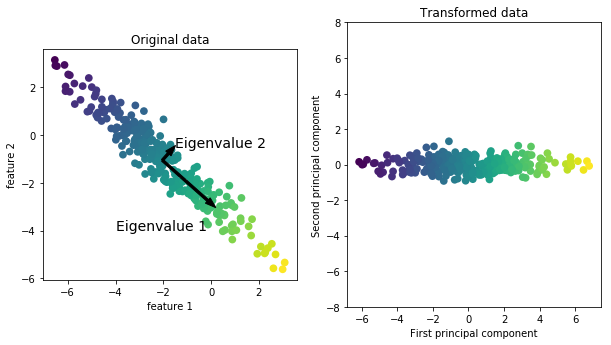

In [41]:
from plot_pca import plot_pca_illustration
plot_pca_illustration()

Since we want to reduce the dimensionality of the data, we won't use all of the eigen values. After sorting we'll  need to pick which eigenvectors we will use to construct ou new subspace. 


In [46]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvectors))]
eigenpairs.sort(reverse=True)

#Reorganize eigen vectors by eigen values
n_components = len(eigenvectors)
eigenvectors = np.vstack([eigenpairs[i][1] for i in range(n)])
eigenvalues = np.vstack([eigenpairs[i][0] for i in range(n)])

In [43]:
eigenvectors

array([[-0.36138659,  0.08452251, -0.85667061, -0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [ 0.58202985, -0.59791083, -0.07623608, -0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [44]:
eigenvalues

array([[ 26.56917643],
       [  6.36512452],
       [  3.61349905],
       [  1.99483333]])

# Explained variance

This is a way to tell how accurate our 2D plot is. If the explained variance is across the first 2 principal components then the 2D plot is a good representation of our data.

In [48]:
n = 2
names = [f'PC {i}' for i in range(1, n  + 1)]
df = pd.DataFrame({'Principal component':names,'Explained Variance':eigenvalues.ravel()/eigenvalues.sum()})
# ravel() transform data into 1D matrix
df
#ns.barplot(x='Principal component',y='Explained Variance',data= df)


,Explained Variance,Principal component
0,0.806733,PC 1
1,0.193267,PC 2


# Altogether

Let put all the piece together to get our working implementation.

In [14]:
def pca(X,n_components=2):

    #standadize
    mu = X.mean(axis=0)
    sigma = X.std(axis=0).mean()
    X= (X - mu) / sigma

    # calculate eigen vectors and values
    eigenvectors, eigenvalues, _ = np.linalg.svd(X.T, full_matrices=False)

    #Sort eigen vectors by size of eigen value
    eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvectors))]
    eigenpairs.sort(reverse=True)

    #Reorganize eigen vectors by eigen values
    n_components = len(eigenvectors)
    eigenvectors = np.vstack([eigenpairs[i][1] for i in range(n_components)])
    eigenvalues = np.vstack([eigenpairs[i][0] for i in range(n_components)])

    k = 2
    return X @ eigenvectors, eigenvectors, eigenvalues

# Sklearn
Just for sanity lets check our implementation against sklearn.

In [15]:
from sklearn.decomposition import PCA

In [16]:
X_transfromed,eigenvectors,eigenvalues = pca(X)

In [17]:
pca_sk = PCA(2)
pca_sk.fit(X)
X_transformed_sk =  pca_sk.fit_transform(X)

In [18]:
pca_sk.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [19]:
eigenvectors

array([[-0.36138659,  0.08452251, -0.85667061, -0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [ 0.58202985, -0.59791083, -0.07623608, -0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [21]:
#rounding error means not totally equal
np.all((np.matrix.round(X_transformed,5) ==  np.matrix.round(X_transformed_sk,5)))

/Users/andy/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


False

# References

* [Eigenvectors and values visually explained](http://setosa.io/ev/eigenvectors-and-eigenvalues/)
* [Understanding Eigenvector and Egienvalues Visually](https://alyssaq.github.io/2015/understanding-eigenvectors-and-eigenvalues-visually/)
* [Plotly PCA](https://plot.ly/ipython-notebooks/principal-component-analysis/)